In [115]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt

from tqdm import tqdm

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [104]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = datasets.ImageFolder('dataset/', transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

classes = ('10c', '10d', '10h', '10s',
           '11c', '11d', '11h', '11s',
           '12c', '12d', '12h', '12s',
           '13c', '13d', '13h', '13s',
           '1c', '1d', '1h', '1s',
           '2c', '2d', '2h', '2s',
           '3c', '3d', '3h', '3s',
           '4c', '4d', '4h', '4s',
           '5c', '5d', '5h', '5s',
           '6c', '6d', '6h', '6s',
           '7c', '7d', '7h', '7s',
           '8c', '8d', '8h', '8s',
           '9c', '9d', '9h', '9s',
           'emp', 'jok')

In [166]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 *104 * 216, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 58)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=67392, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=58, bias=True)
)

In [167]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 50

In [183]:
for epoch in range(EPOCHS):
    correct = 0
    total = 0
    with tqdm(trainloader, unit="batch") as tepoch:
        for data, target in tepoch:
            tepoch.set_description(f"Epoch {epoch}")
        
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
        
            output = net(data.view(-1, 3 * 104 * 216))
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
            running_loss += loss.item()
            
            for idx, i in enumerate(output):
                if torch.argmax(i) == target[idx]:
                    correct += 1
                total += 1
            
            tepoch.set_postfix(loss=loss.item(), acc=100.*correct/total)

            
print('Finished training')

  0%|                                                                                         | 0/10 [00:00<?, ?batch/s]


KeyboardInterrupt: 

In [189]:
torch.save(net.state_dict(), './model/4-linear-50-epoch.pth')

In [184]:
print(classes[torch.argmax(output[2])])

10s


In [185]:
data = data.cpu()

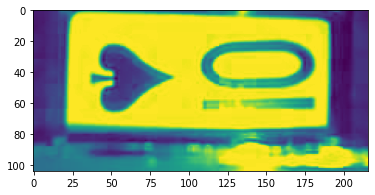

In [186]:
plt.imshow(data[2][0].view(104, 216))
plt.show()

In [188]:
for i, test_data in enumerate(trainset):
    test_data, test_target = test_data
    test_data, test_target = test_data.to(device), test_target
    print(test_data.shape)
    test_output = net(test_data.view(-1, 3 * 104 * 216))
    print(test_output)
    break

torch.Size([3, 104, 216])
tensor([[-3.2968e-04, -3.3827e+01, -3.3996e+01, -2.7101e+01, -1.5038e+01,
         -3.8436e+01, -1.8764e+01, -4.2149e+01, -1.4293e+01, -3.6427e+01,
         -2.8030e+01, -3.5988e+01, -9.1327e+00, -3.5613e+01, -1.1685e+01,
         -1.4863e+01, -2.3150e+01, -3.9154e+01, -2.0703e+01, -1.7781e+01,
         -2.7743e+01, -3.5592e+01, -2.1372e+01, -2.3873e+01, -2.2095e+01,
         -4.2956e+01, -1.2945e+01, -1.4808e+01, -1.9394e+01, -3.1570e+01,
         -2.4448e+01, -2.4356e+01, -1.0944e+01, -3.7754e+01, -1.0057e+01,
         -1.6721e+01, -1.5288e+01, -3.6252e+01, -2.0074e+01, -1.9577e+01,
         -1.2872e+01, -3.7125e+01, -1.5490e+01, -2.2181e+01, -8.8788e+00,
         -3.7592e+01, -2.1433e+01, -2.7407e+01, -1.1985e+01, -3.4266e+01,
         -2.8512e+01, -3.2301e+01, -3.6963e+01, -3.3941e+01, -4.8867e+01,
         -5.2248e+01, -4.5999e+01, -4.3687e+01]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
